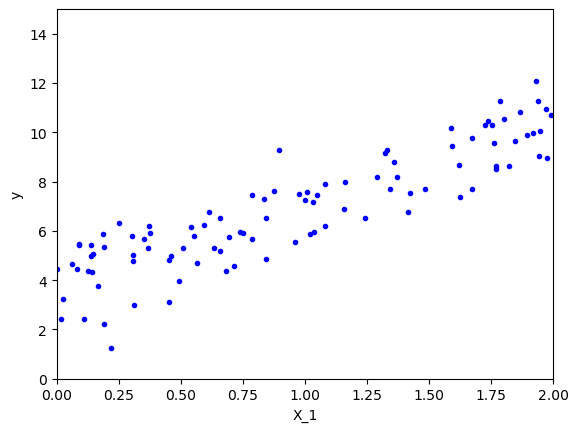

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2*np.random.rand(100,1)
y = 4+ 3*X +np.random.randn(100,1)
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0,2,0,15])
plt.show()

In [2]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [4]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m* X_b.T.dot(X_b.dot(theta)-y)
theta = theta - eta*gradients


In [12]:
theta_path_bgd = []
def plot_gradient_descent(theta,eta,theta_path = None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new,y_predict,'b-')
        gradients = 2/m* X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0,2,0,15])
    plt.title('eta = {}'.format(eta))


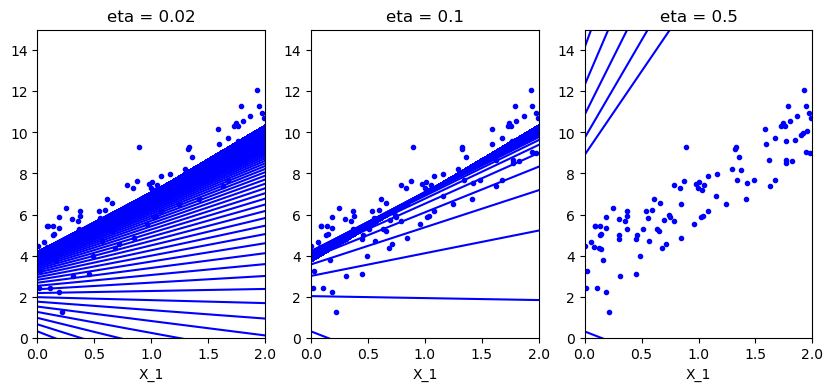

In [13]:
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta,eta = 0.02)
plt.subplot(132)
plot_gradient_descent(theta,eta = 0.1,theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta,eta = 0.5)
plt.show()

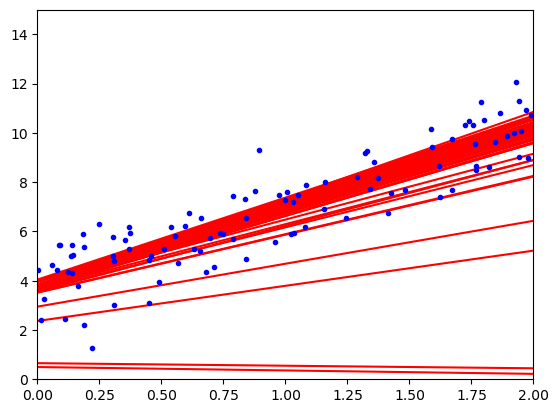

In [41]:
theta_path_sgd=[]
m = len(X_b)
np.random.seed(42)
n_epochs = 50

t0 = 5
t1 = 50

def learning_schedule(t):
    return t0/(t1+t)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch < 10 and i<10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r-')
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients
        theta_path_sgd.append(theta)
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

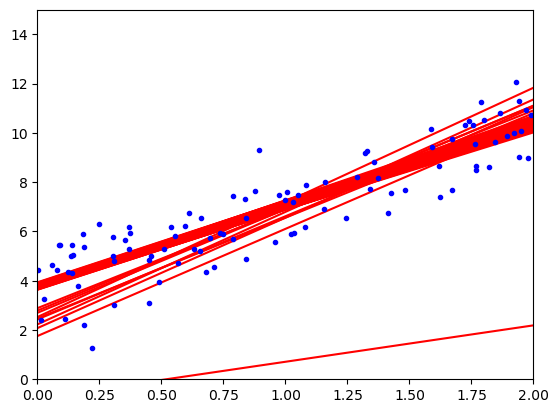

In [74]:
theta_path_mgd=[]
n_epochs = 50
m = len(X_b)
minibatch = 16
theta = np.random.randn(2,1)
#
t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)
np.random.seed(42)
t = 0
for epoch in range(n_epochs):
    for i in range(m):
        if epoch < 10 and i<10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r-')
        random_index = np.random.randint(m-minibatch)
        xi = X_b[random_index:random_index + minibatch]
        yi = y[random_index:random_index + minibatch]
        gradients = 2/minibatch* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients
        theta_path_mgd.append(theta)
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

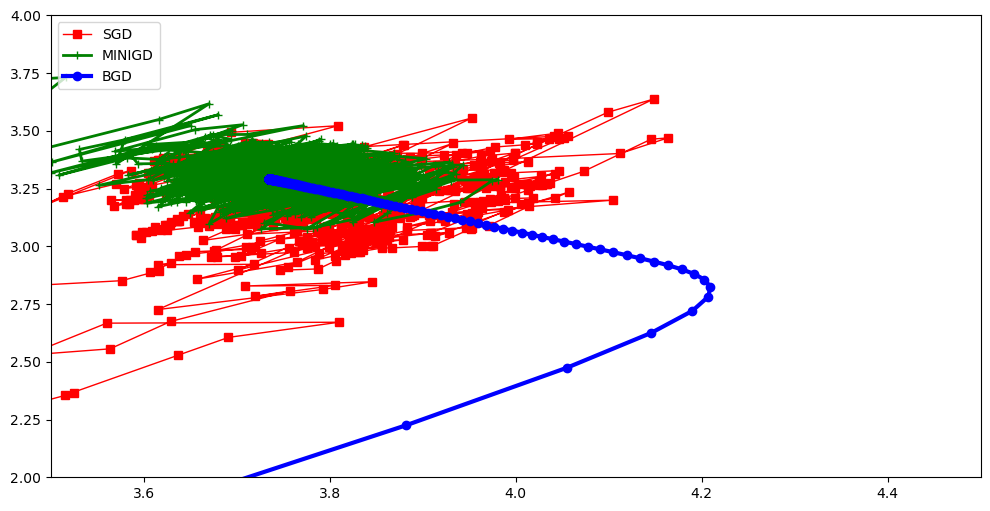

In [75]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
plt.figure(figsize=(12,6))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],'r-s',linewidth=1,label='SGD')
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],'g-+',linewidth=2,label='MINIGD')
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],'b-o',linewidth=3,label='BGD')
plt.legend(loc='upper left')
plt.axis([3.5,4.5,2.0,4.0])
plt.show()